> # **Name: Nader Elhadedy**

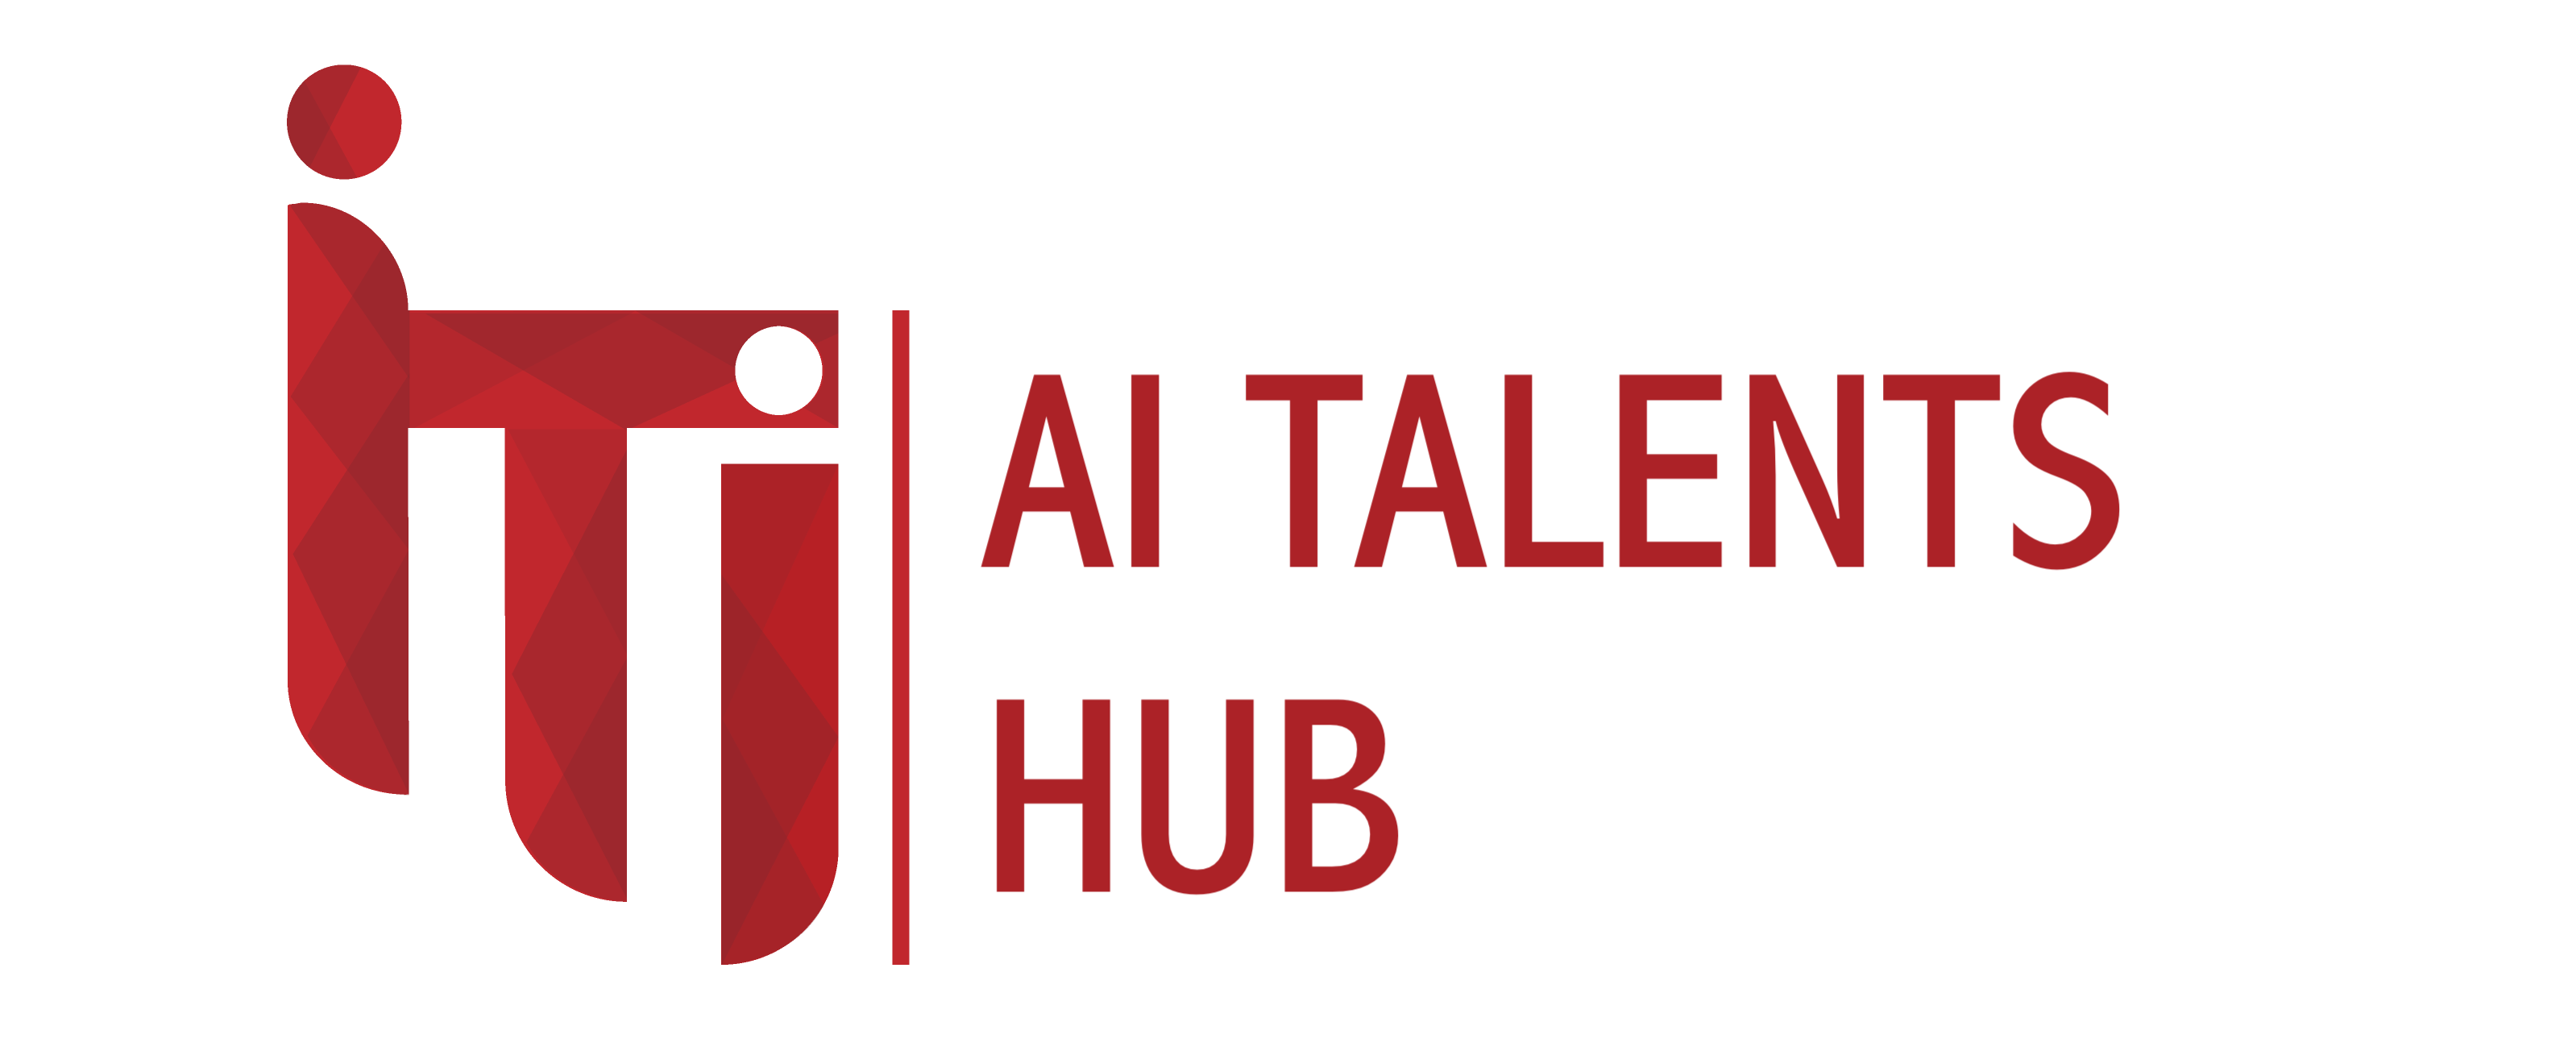

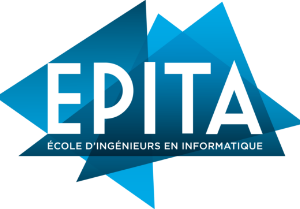

Write the linear regression with
numpy and matplotlib. The code must contain only universal functions of numpy, pyplot
functions of matplotlib using the FuelConsumptionCo2 data set to implement this project with this steps:


**Linear regression is a method for modeling the relationship between two scalar values: the input variable x and the output variable y.**



The model assumes that y is a linear function or a weighted sum of the input variable.

**y = f(x)**

Or, stated with the coefficients.

**y = b0 + b1 . x1**

The model can also be used to model an output variable given multiple input variables called multivariate linear regression (below, brackets were added for readability).

**y = b0 + (b1 . x1) + (b2 . x2) + ...**

The objective of creating a linear regression model is to find the values for the coefficient values (b) that minimize the error in the prediction of the output variable y.

## Matrix Formulation of Linear Regression
Linear regression can be stated using Matrix notation; for example:

**y = X . b**

Or, without the dot notation.

**y = Xb**

Where X is the input data and each column is a data feature, b is a vector of coefficients and y is a vector of output variables for each row in X.

$X =
 \begin{pmatrix}
  x_{1,1} & x_{1,2} & x_{1,3}\\
  x_{2,1} & x_{2,2} & x_{2,3}\\
  x_{3,1} & x_{3,2} & x_{3,3}\\
  x_{4,1} & x_{4,2} & x_{4,3}\\
 \end{pmatrix}$

$b =
 \begin{pmatrix}
  b_{1} \\
  b_{2} \\
  b_{3}\\
 \end{pmatrix}$

$y =
 \begin{pmatrix}
  y_{1} \\
  y_{2} \\
  y_{3}\\
  y_{4}\\
 \end{pmatrix}$

# Making the Necessary Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import genfromtxt
from numpy.linalg import inv

# Loading a dataset 

In [2]:
data = genfromtxt('assig2_data.csv',delimiter=" ")

## The example below defines a 5×2 matrix dataset, splits it into X and y components, and plots the dataset as a scatter plot.



In [3]:
X = np.array(data[:,0])
Y = np.array(data[:,1])

## Plot your Dataset

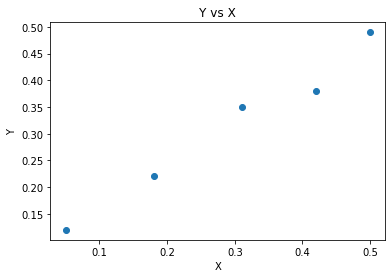

In [4]:
plt.scatter(X,Y)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Y vs X")
plt.show()

# Solve the linear regression via normal equations

## Solve Directly
The first approach is to attempt to solve the regression problem directly.

That is, given X, what are the set of coefficients b that when multiplied by X will give y. As we saw in a previous section, the normal equations define how to calculate b directly.


**b = (X^T . X)^-1 . X^T . y**

This can be calculated directly in NumPy using the inv() function for calculating the matrix inverse.


**b = inv(X.T.dot(X)).dot(X.T).dot(y)**

Once the coefficients are calculated, we can use them to predict outcomes given X.

**yhat = X.dot(b)**



## Plot your Result

In [5]:
X = X.reshape(len(X),1)

b = inv(X.T.dot(X)).dot(X.T).dot(Y)

yhat = X.dot(b)

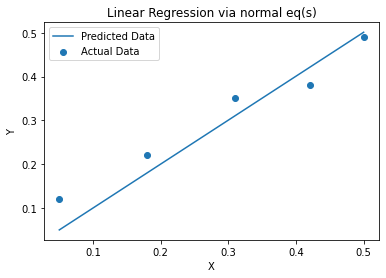

In [6]:
plt.scatter(X,Y, label="Actual Data")
plt.plot(X,yhat, label="Predicted Data")
plt.legend()
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Linear Regression via normal eq(s)")
plt.show()

# Solve the linear regression via QR and plot the result

## Solve via QR Decomposition
The QR decomposition is an approach of breaking a matrix down into its constituent elements.


**A = Q . R**

Where A is the matrix that we wish to decompose, Q a matrix with the size m x m, and R is an upper triangle matrix with the size m x n.

The QR decomposition is a popular approach for solving the linear least squares equation.

Stepping over all of the derivation, the coefficients can be found using the Q and R elements as follows:

**b = R^-1 . Q.T . y**

The approach still involves a matrix inversion, but in this case only on the simpler R matrix.

The QR decomposition can be found using the qr() function in NumPy. The calculation of the coefficients in NumPy looks as follows:

**Q, R = qr(X)**

**b = inv(R).dot(Q.T).dot(y)**

**Q, R = qr(X)**

**b = inv(R).dot(Q.T).dot(y)**


In [7]:
from numpy.linalg import qr

Q, R = qr(X)

b = inv(R).dot(Q.T).dot(Y)

yhat = X.dot(b)

## Plot your Result

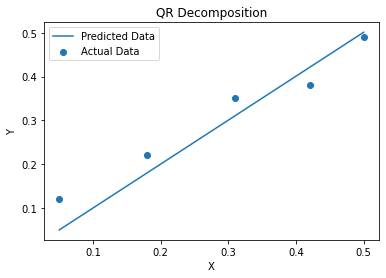

In [8]:
plt.scatter(X,Y, label="Actual Data")
plt.plot(X,yhat, label="Predicted Data")
plt.legend()
plt.xlabel("X")
plt.ylabel("Y")
plt.title("QR Decomposition")
plt.show()

# Solve the linear regression via Solve via SVD and Pseudoinverse and plot the result

Solve via Singular-Value Decomposition
The Singular-Value Decomposition, or SVD for short, is a matrix decomposition method like the QR decomposition.


**X = U . Sigma . V^***

Where A is the real n x m matrix that we wish to decompose, U is a m x m matrix, Sigma (often represented by the uppercase Greek letter Sigma) is an m x n diagonal matrix, and V^* is the conjugate transpose of an n x n matrix where * is a superscript.

Unlike the QR decomposition, all matrices have an SVD decomposition. As a basis for solving the system of linear equations for linear regression, SVD is more stable and the preferred approach.

Once decomposed, the coefficients can be found by calculating the pseudoinverse of the input matrix X and multiplying that by the output vector y.


**b = X^+ . y**

Where the pseudoinverse is calculated as following:

**X^+ = U . D^+ . V^T**

Where X^+ is the pseudoinverse of X and the + is a superscript, D^+ is the pseudoinverse of the diagonal matrix Sigma and V^T is the transpose of V^*.


We can get U and V from the SVD operation. D^+ can be calculated by creating a diagonal matrix from Sigma and calculating the reciprocal of each non-zero element in Sigma.

$Sigma  =
 \begin{pmatrix}
  s_{1,1} & 0 & 0\\
  0 & s_{2,2} & 0 \\
  0 & 0 & s_{3,3}\\
 \end{pmatrix}$

$D  =
 \begin{pmatrix}
  1/s_{1,1} & 0 & 0\\
  0 & 1/s_{2,2} & 0 \\
  0 & 0 & 1/s_{3,3}\\
 \end{pmatrix}$

In [9]:
from numpy.linalg import pinv

b = pinv(X).dot(Y)

yhat = X.dot(b)

## Plot your Result

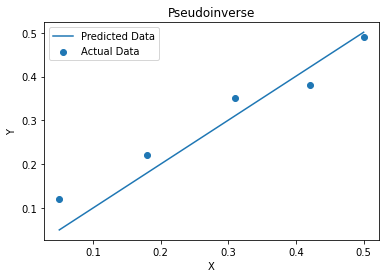

In [10]:
plt.scatter(X,Y, label="Actual Data")
plt.plot(X,yhat, label="Predicted Data")
plt.legend()
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Pseudoinverse")
plt.show()